# FBN1

FBN1 encodes the fibrillin-1 protein. Pathogenic variants in FBN1 are found in Marfan syndrome and a number of other disorders including  [Weill-Marchesani syndrome](https://omim.org/entry/608328) (WMS), [geleophysic dysplasia](https://omim.org/entry/231050) (GPHYSD), [acromicric dysplasia](https://omim.org/entry/102370) (ACMICD), and [Marfan lipodystrophy syndrome](https://omim.org/entry/616914).

We will investigate correlations between variant location and disease diagnosis.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


# FBN1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for FBN1.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'FBN1'
mane_tx_id = 'NM_000138.5'
mane_protein_id = "NP_000129.3"
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 144/144 [00:00<00:00, 640.04 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

viewer = CohortViewer(hpo=hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
79,Ectopia lentis
63,Myopia
52,Arachnodactyly
36,Aortic root aneurysm
32,Short foot
32,Short palm
29,Joint hypermobility
29,High palate
26,Scoliosis
23,Mitral valve prolapse


In [5]:
from gpsea.view import CohortVariantViewer
cvv = CohortVariantViewer(tx_id=mane_tx_id)
cvv.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
7,15_48505069_48505069_C_T,c.1916G>A (p.Cys639Tyr),16,missense
7,15_48508660_48508660_A_G,c.1759T>C (p.Cys587Arg),15,missense
6,15_48425483_48425483_C_T,c.7339G>A (p.Glu2447Lys),60,missense
6,15_48474584_48474584_C_T,c.4031G>A (p.Gly1344Glu),33,missense
6,15_48463210_48463210_T_C,c.5096A>G (p.Tyr1699Cys),42,missense
6,15_48460258_48460258_C_T,c.5284G>A (p.Gly1762Ser),43,missense
4,15_48613073_48613073_G_A,c.184C>T (p.Arg62Cys),3,missense
3,15_48467994_48467994_C_G,c.4691G>C (p.Cys1564Ser),38,missense
3,15_48460292_48460292_A_C,c.5250T>G (p.Ser1750Arg),43,missense
2,15_48463124_48463124_C_T,c.5182G>A (p.Ala1728Thr),42,missense


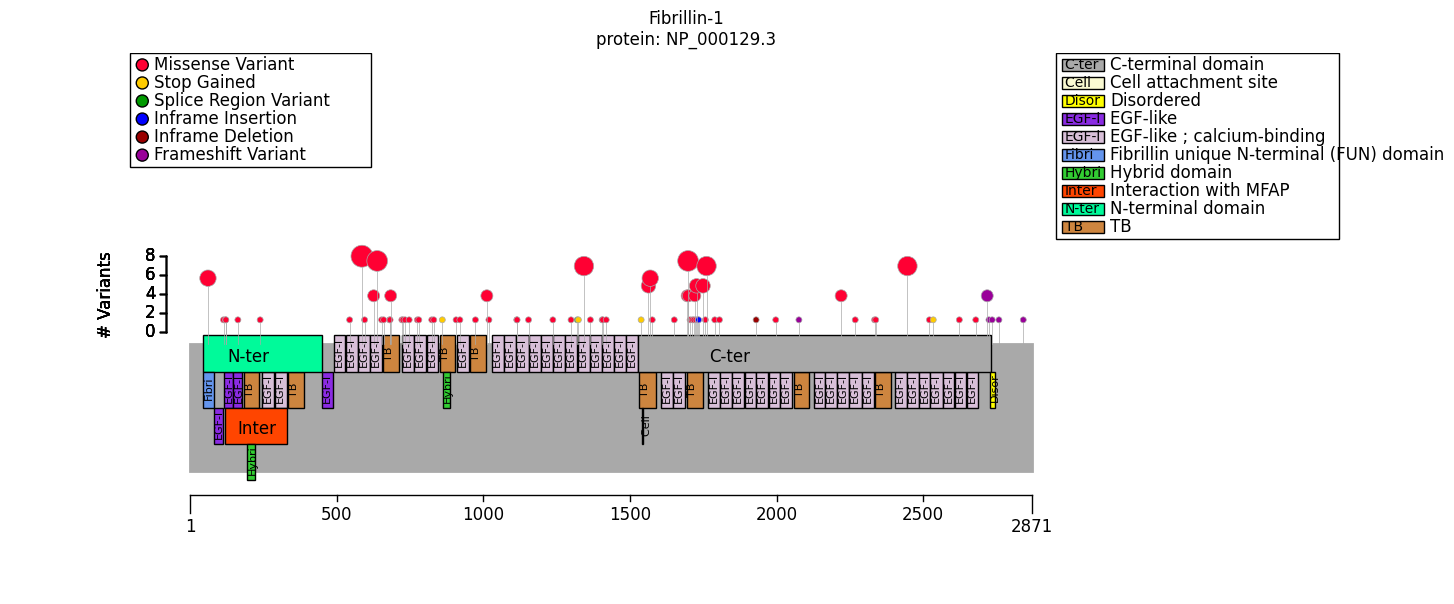

In [6]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

fbn1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
fbn1_fig.tight_layout()

In [7]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
9,N-terminal domain,Region,46 - 450,p.Cys123Arg; p.Asn164Ser; p.Arg62Cys; p.Arg122Cys; p.Arg240Cys; p.Ser115Cys
4,Fibrillin unique N-terminal (FUN) domain,Region,46 - 81,p.Arg62Cys
0,EGF-like 1,Domain,82 - 112,
2,EGF-like 2,Domain,116 - 146,p.Cys123Arg; p.Arg122Cys
4,Interaction with MFAP4,Region,120 - 329,p.Cys123Arg; p.Arg240Cys; p.Asn164Ser; p.Arg122Cys
1,EGF-like 3,Domain,148 - 178,p.Asn164Ser
0,TB 1,Domain,185 - 236,
0,Hybrid domain 1,Region,196 - 221,
0,EGF-like 4; calcium-binding,Domain,247 - 287,
0,EGF-like 5; calcium-binding,Domain,289 - 329,


# Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = monoallelic_classifier(a_predicate=missense, b_predicate=~missense, a_label="missense", b_label= "other")
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(missense_result)


Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,45
HMF03,Skipping term because of a child term with the same individual counts,1
HMF08,Skipping general term,77
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,213


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense,other,Corrected p values,p values
Arachnodactyly [HP:0001166],34/81 (42%),18/22 (82%),0.012670,0.001392
Thoracic aortic aneurysm [HP:0012727],25/64 (39%),12/14 (86%),0.012670,0.002304
Ectopia lentis [HP:0001083],68/87 (78%),11/22 (50%),0.047069,0.014609
Aortic root aneurysm [HP:0002616],25/115 (22%),11/23 (48%),0.047069,0.017116
High palate [HP:0000218],19/71 (27%),10/18 (56%),0.049862,0.026313
Short stature [HP:0004322],32/78 (41%),1/13 (8%),0.049862,0.027197
Tall stature [HP:0000098],29/90 (32%),10/19 (53%),0.182141,0.115908
Myopia [HP:0000545],56/78 (72%),15/18 (83%),0.530614,0.385901
Abnormal appendicular skeleton morphology [HP:0011844],66/66 (100%),19/19 (100%),1.000000,1.000000
Abnormality of joint mobility [HP:0011729],68/68 (100%),9/9 (100%),1.000000,1.000000


In [11]:
# Compare missense variants in cbEGF vs TB domains
from gpsea.analysis.predicate import protein_feature, anyof, allof

tb_domains = list() # TB 1 to TB9
for i in range(1,10):
    label = f"TB {i}"
    is_tb = protein_feature(feature_id=label, protein_metadata=protein_meta)
    tb_domains.append(is_tb)

cbEGF_domains = list() # cbEGF 1 to 47
for i in range(1,48):
    label = f"EGF-like {i}; calcium-binding" 
    is_cbEGF = protein_feature(feature_id=label, protein_metadata=protein_meta)
    cbEGF_domains.append(is_cbEGF)


is_tb = anyof(tb_domains)
is_tb_missense = allof((is_tb, missense))
is_egf = anyof(cbEGF_domains)
is_egf_missense = allof((is_cbEGF, missense))

tb_vs_egf_clf = monoallelic_classifier(
    a_predicate=is_tb, 
    b_predicate=is_egf, 
    a_label="TB domain", b_label="cbEGF")
tb_vs_egf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=tb_vs_egf_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=tb_vs_egf_result)

Allele group,TB domain,cbEGF,Corrected p values,p values
Short stature [HP:0004322],23/39 (59%),0/24 (0%),0.000004,4.394550e-07
Proportionate short stature [HP:0003508],20/36 (56%),0/24 (0%),0.000009,2.353473e-06
Severe short stature [HP:0003510],15/36 (42%),0/24 (0%),0.000362,1.355862e-04
Tall stature [HP:0000098],7/38 (18%),21/40 (52%),0.004344,2.171943e-03
Ectopia lentis [HP:0001083],9/18 (50%),48/59 (81%),0.021292,1.330773e-02
Myopia [HP:0000545],12/17 (71%),40/50 (80%),0.672207,5.041552e-01
Abnormal lens morphology [HP:0000517],11/11 (100%),50/50 (100%),1.000000,1.000000e+00
Arachnodactyly [HP:0001166],7/17 (41%),23/52 (44%),1.000000,1.000000e+00


# stiff skin
These are three variants (7 observations) from the stiff skin cohort. We are (probably) not seeing the associations because the other
diseases are not annotated to excluded terms.
15_48467994_48467994_C_G	c.4691G>C	p.Cys1564Ser	exon 38	(n=3)
15_48467975_48467975_C_A	c.4710G>T	p.Trp1570Cys	exon 38 (n=2)
15_48467975_48467975_C_G	c.4710G>C	p.Trp1570Cys	38	(n=2)

Note that what the authors call exon 37 is exon 38 because of a non-coding 5' exon.

In [12]:
from gpsea.analysis.predicate import exon

exon_37 = exon(exon=38, tx_id=mane_tx_id)
ex37_clf = monoallelic_classifier(a_predicate=exon_37, b_predicate=~exon_37, a_label="exon 37", b_label="other")
ex37_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=ex37_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=ex37_result)

Allele group,exon 37,other,Corrected p values,p values
Stiff skin [HP:0030053],8/9 (89%),0/50 (0%),3.652809e-08,4.058677e-09
Ectopia lentis [HP:0001083],1/9 (11%),78/100 (78%),5.031398e-04,1.118088e-04
Arachnodactyly [HP:0001166],0/8 (0%),52/95 (55%),8.034459e-03,2.678153e-03
Thoracic aortic aneurysm [HP:0012727],1/9 (11%),36/69 (52%),6.900550e-02,3.066911e-02
Pectus carinatum [HP:0000768],1/1 (100%),10/87 (11%),2.250000e-01,1.250000e-01
High palate [HP:0000218],1/1 (100%),28/88 (32%),4.887640e-01,3.258427e-01
Abnormal lens morphology [HP:0000517],3/3 (100%),80/80 (100%),1.000000e+00,1.000000e+00
Myopia [HP:0000545],7/9 (78%),64/87 (74%),1.000000e+00,1.000000e+00
Abnormality of joint mobility [HP:0011729],8/8 (100%),69/69 (100%),1.000000e+00,1.000000e+00


# C term

In [13]:
exon_59 = exon(exon=60, tx_id=mane_tx_id)
exon_60 = exon(exon=61, tx_id=mane_tx_id)
exon_61 = exon(exon=62, tx_id=mane_tx_id)
exon_62 = exon(exon=63, tx_id=mane_tx_id)
exon_63 = exon(exon=64, tx_id=mane_tx_id)
exon_64 = exon(exon=65, tx_id=mane_tx_id)
exon_65 = exon(exon=66, tx_id=mane_tx_id)

c_term = exon_59 | exon_60 | exon_61 | exon_62 | exon_63 | exon_64 | exon_65
c_term_missense = missense & c_term

c_term_clf = monoallelic_classifier(
    a_predicate=c_term_missense, 
    b_predicate=~c_term_missense, 
    a_label="C term missense", 
    b_label="other")
c_term_missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=c_term_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=c_term_missense_result)

Allele group,C term missense,other,Corrected p values,p values
Joint hypermobility [HP:0001382],5/6 (83%),27/115 (23%),0.044092,0.004899
Pectus excavatum [HP:0000767],3/6 (50%),12/98 (12%),0.114507,0.037755
Myopia [HP:0000545],2/6 (33%),69/90 (77%),0.114507,0.038169
Tall stature [HP:0000098],1/1 (100%),38/108 (35%),0.805046,0.357798
Ectopia lentis [HP:0001083],3/5 (60%),76/104 (73%),1.000000,0.614177
Abnormal lens morphology [HP:0000517],3/3 (100%),80/80 (100%),1.000000,1.000000
Abnormal appendicular skeleton morphology [HP:0011844],3/3 (100%),82/82 (100%),1.000000,1.000000
Arachnodactyly [HP:0001166],3/6 (50%),49/97 (51%),1.000000,1.000000
Abnormality of joint mobility [HP:0011729],5/5 (100%),72/72 (100%),1.000000,1.000000


# lipodystrophy
The marfanoid-progeroid-lipodystrophy syndrome is related to variants in exon 64 associated with frame shifts and premature truncation codons that are predicted not to be subjected to NMD ([Passarge et al. (2016)](https://pubmed.ncbi.nlm.nih.gov/26860060/)).

In [14]:
exon_64 = exon(exon=65, tx_id=mane_tx_id)
exon_65 = exon(exon=66, tx_id=mane_tx_id)

frameshift = variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=mane_tx_id)
splice = variant_effect(VariantEffect.SPLICE_REGION_VARIANT, tx_id=mane_tx_id)

fs_last_two = (frameshift | splice) & (exon_64 | exon_65)

fs_last_two_clf = monoallelic_classifier(a_predicate=fs_last_two, b_predicate=~fs_last_two, a_label="fs last two", b_label= "other")

fs_last_two_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=fs_last_two_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=fs_last_two_result)

Allele group,fs last two,other,Corrected p values,p values
Hyperextensibility of the finger joints [HP:0001187],2/2 (100%),1/90 (1%),0.008600,0.000717
High palate [HP:0000218],3/3 (100%),26/86 (30%),0.193054,0.032176
Joint hypermobility [HP:0001382],2/2 (100%),30/119 (25%),0.273278,0.068320
Pectus excavatum [HP:0000767],2/4 (50%),13/100 (13%),0.282611,0.098527
Arachnodactyly [HP:0001166],4/4 (100%),48/99 (48%),0.282611,0.117754
Scoliosis [HP:0002650],1/1 (100%),26/93 (28%),0.574468,0.287234
Myopia [HP:0000545],4/4 (100%),67/92 (73%),0.976920,0.569870
Thoracic aortic aneurysm [HP:0012727],1/2 (50%),36/76 (47%),1.000000,1.000000
Abnormality of joint mobility [HP:0011729],3/3 (100%),74/74 (100%),1.000000,1.000000
Abnormal lens morphology [HP:0000517],3/3 (100%),80/80 (100%),1.000000,1.000000


In [15]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

result_list = [missense_result, tb_vs_egf_result ,ex37_result, fs_last_two_result]
f_results = [GPAnalysisResultSummary.from_multi(r) for r in result_list]

FBN1_caption = ""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=FBN1_caption)

In [16]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

HPO Term,missense,other,p-val,adj. p-val
Arachnodactyly [HP:0001166],34/81 (42%),18/22 (82%),0.001,0.013
Ectopia lentis [HP:0001083],68/87 (78%),11/22 (50%),0.015,0.047
High palate [HP:0000218],19/71 (27%),10/18 (56%),0.026,0.050
Aortic root aneurysm [HP:0002616],25/115 (22%),11/23 (48%),0.017,0.047
Thoracic aortic aneurysm [HP:0012727],25/64 (39%),12/14 (86%),0.002,0.013
Short stature [HP:0004322],32/78 (41%),1/13 (8%),0.027,0.050
HPO Term,TB domain,cbEGF,p-val,adj. p-val
Ectopia lentis [HP:0001083],9/18 (50%),48/59 (81%),0.013,0.021
Tall stature [HP:0000098],7/38 (18%),21/40 (52%),0.002,0.004
Severe short stature [HP:0003510],15/36 (42%),0/24 (0%),1.36e-04,3.62e-04


In [17]:
summarizer.process_latex(report=report, protein_fig=fbn1_fig)

Figure saved to ../../supplement/img/FBN1_protein_diagram-draft.pdf
Output to ../../supplement/tex/FBN1_summary_draft.tex
